In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import load_model
import os
import tensorflow as tf


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/RGB_5G.zip" -d "/content/dataset/"  

Archive:  /content/drive/MyDrive/RGB_5G.zip
   creating: /content/dataset/RGB_5G/Test/
   creating: /content/dataset/RGB_5G/Test/16QAM/
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB1.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB10.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB100.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB101.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB102.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB103.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB104.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB105.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB106.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB107.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB108.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB109.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB11.png  
  inflatin

In [4]:
IMAGE_SIZE = [224, 224]
valid_path = r'/content/dataset/RGB_5G/Test'
train_path = r'/content/dataset/RGB_5G/Train'

In [5]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [6]:
for layer in mobilenet.layers:
    layer.trainable = False

In [7]:
folders = glob(r'/content/dataset/RGB_5G/Train/*')

In [8]:
x = Flatten()(mobilenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model_mobilenet_RGB = Model(inputs=mobilenet.input, outputs=prediction)

In [10]:
model_mobilenet_RGB.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1400 images belonging to 5 classes.
Found 600 images belonging to 5 classes.


In [13]:
history_mobilenet_RGB = model_mobilenet_RGB.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)    

model_mobilenet_RGB.save('mobilenet_RGB_model.h5')
print("model saved to Disk.")

Epoch 1/10
44/44 [==============================] - 126s 3s/step - loss: 8.1415 - accuracy: 0.2507 - val_loss: 3.7374 - val_accuracy: 0.2550
Epoch 2/10
44/44 [==============================] - 121s 3s/step - loss: 2.8738 - accuracy: 0.4036 - val_loss: 3.5839 - val_accuracy: 0.3150
Epoch 3/10
44/44 [==============================] - 121s 3s/step - loss: 2.0402 - accuracy: 0.4929 - val_loss: 3.0929 - val_accuracy: 0.3367
Epoch 4/10
44/44 [==============================] - 119s 3s/step - loss: 1.9906 - accuracy: 0.5521 - val_loss: 3.9604 - val_accuracy: 0.2800
Epoch 5/10
44/44 [==============================] - 124s 3s/step - loss: 2.0766 - accuracy: 0.5579 - val_loss: 3.2956 - val_accuracy: 0.3300
Epoch 6/10
44/44 [==============================] - 121s 3s/step - loss: 1.8622 - accuracy: 0.5843 - val_loss: 4.7080 - val_accuracy: 0.3217
Epoch 7/10
44/44 [==============================] - 120s 3s/step - loss: 1.8434 - accuracy: 0.6386 - val_loss: 3.9557 - val_accuracy: 0.3250
Epoch 8/10
44

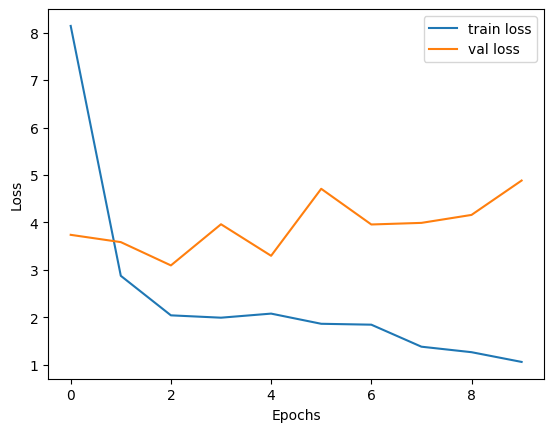

In [14]:
plt.plot(history_mobilenet_RGB.history['loss'], label='train loss')
plt.plot(history_mobilenet_RGB.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

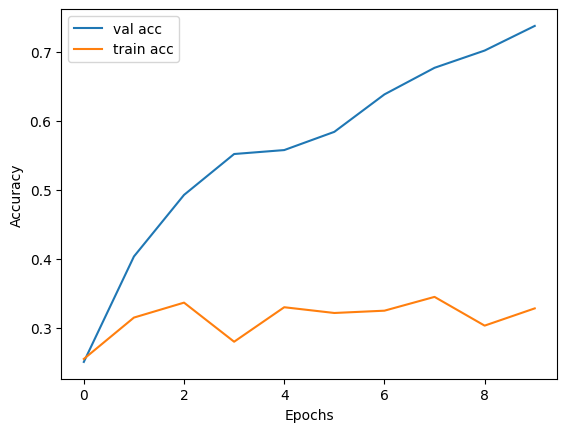

In [15]:
plt.plot(history_mobilenet_RGB.history['accuracy'], label='val acc')
plt.plot(history_mobilenet_RGB.history['val_accuracy'], label='train acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [16]:
model_mobilenet_new_RGB = load_model('mobilenet_RGB_model.h5')

In [17]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 600 images belonging to 5 classes.


In [18]:
predictions = model_mobilenet_new_RGB.predict(test_data_generator, steps=test_steps_per_epoch)


19/19 [==============================] - 30s 2s/step


In [19]:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

[0 1 0 0 0 4 3 1 3 0 0 3 0 0 3 0 0 0 0 0 0 0 4 0 3 3 0 3 4 3 0 1 0 0 0 0 2
 0 0 0 0 1 3 0 0 0 0 0 0 0 3 4 1 0 3 2 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 3 4 0 4 4 0 0 3 0 0 0 3 3 0 2 2 0 0 0 0 1 0 0 0 0 0 3 1 0 0 3 3 0 0 3 0 0
 3 0 3 0 0 0 3 3 0 4 4 0 4 3 4 0 1 4 4 1 1 3 4 4 3 3 3 4 3 3 4 3 4 1 1 4 4
 4 4 1 4 4 3 1 3 1 4 3 4 4 1 4 3 3 3 4 3 3 0 4 3 3 4 0 4 3 4 3 0 3 3 4 0 3
 3 0 3 3 4 4 4 3 0 1 4 4 1 0 1 4 3 0 4 4 1 4 3 3 3 3 4 3 4 4 3 0 3 0 4 3 3
 4 2 3 3 0 4 4 3 0 4 4 3 1 4 4 3 3 0 0 0 0 1 3 0 0 3 0 0 3 0 0 3 4 2 0 0 0
 1 0 0 3 3 3 0 0 1 0 0 3 3 0 3 0 4 3 0 0 0 0 0 0 0 0 4 0 0 0 0 3 0 0 3 3 0
 1 0 0 3 3 0 4 0 3 3 4 0 1 0 0 4 0 0 3 0 0 2 3 0 3 3 4 0 4 4 0 0 0 0 3 0 3
 4 0 0 3 3 0 3 4 0 0 0 0 0 2 3 0 3 0 3 0 0 0 1 0 3 0 0 4 3 3 3 3 3 3 3 3 1
 4 0 4 4 3 3 1 4 4 1 3 1 4 3 4 4 4 4 3 3 4 4 3 3 3 4 4 4 4 3 3 1 3 4 3 4 4
 3 3 4 3 4 4 4 4 3 4 3 3 3 3 4 1 3 4 4 1 1 0 3 3 3 1 4 1 3 4 4 0 3 3 0 4 3
 3 3 3 3 4 1 4 3 0 3 4 4 3 3 3 2 3 3 3 3 3 3 3 4 3 3 3 3 1 3 3 4 3 3 4 0 4
 3 3 4 4 3 3 3 0 3 3 3 4 

In [20]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [21]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report) 
print(cmat)
print(acc)

              precision    recall  f1-score   support

       16QAM       0.44      0.64      0.52       120
       32QAM       0.25      0.12      0.16       120
        4QAM       0.33      0.03      0.05       120
       64QAM       0.29      0.51      0.37       120
        8QAM       0.29      0.35      0.31       120

    accuracy                           0.33       600
   macro avg       0.32      0.33      0.28       600
weighted avg       0.32      0.33      0.28       600

[[77  9  4 23  7]
 [15 14  1 43 47]
 [69  6  3 31 11]
 [ 6 12  1 61 40]
 [ 7 16  0 55 42]]
0.3283333333333333


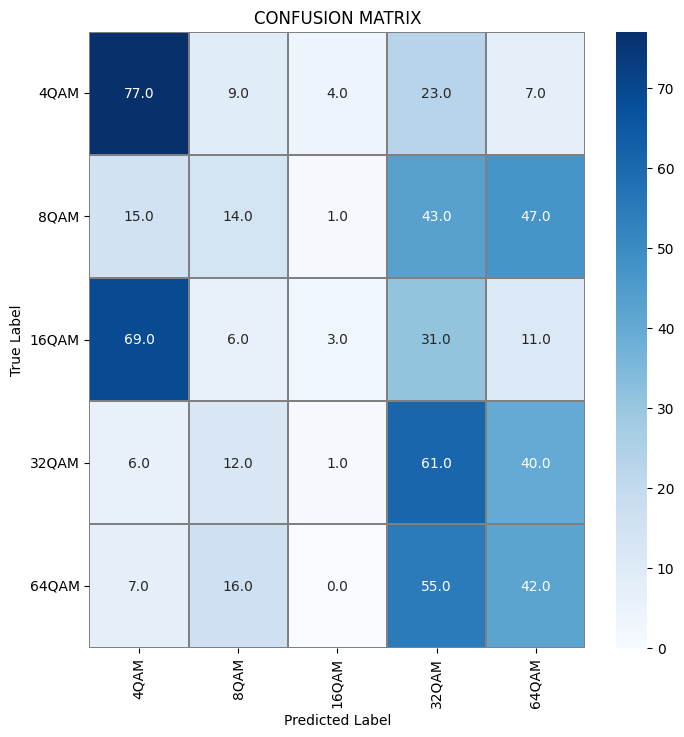

In [22]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['4QAM', '8QAM', '16QAM', '32QAM', '64QAM'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['4QAM', '8QAM', '16QAM', '32QAM', '64QAM'])

plt.title("CONFUSION MATRIX")
plt.show()